<a href="https://colab.research.google.com/github/gustavofelicidade/classificadores_para_plantas/blob/main/Plant_Village.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 5
### NCG-040 - Introdução à Visão Computacional

**Instruções:**

 1. Comentários nos códigos desenvolvidos.
 1. Caso exista uma pergunta, deve ser respondida como comentários no arquivo ou em uma nova célula de texto.
 1. Digitar seu nome e DRE abaixo.
 1. Ao finalizarem a lista, renomeie ou salve uma cópia do arquivo no formato NomeSobrenome_ListaX.ipynb
 1. Enviar via Dropbox até 12/10/2021 - https://www.dropbox.com/request/BHSy3XhiLxmLF1tq45a7

`Nome: ` Gustavo Felicidade

`DRE: ` 118171109

### 0) Instruções

Para esta lista, vamos fazer algo um pouco diferente. Vocês estão livres para escolher um dataset simples e fazer um treinamento de rede neural, conforme visto nas aulas do dia 15, 17 e 22 de Setembro. No mínimo uma tarefa de classificação binária.

Dica: Cats vs Dogs do Kaggle ou similar

**Importando Bibliotecas**

In [1]:
# Rodar no Jupyter
!conda install -c anaconda tensorflow-datasets # Rodar no Jupyter
!pip install tensorflow-datasets               # Rodar no Colab
!pip install -q tf-nightly  

import tensorflow_datasets as tfds
import tensorflow as tf

/bin/bash: conda: command not found
     |████████████████████████████████| 490.3 MB 28 kB/s 
     |████████████████████████████████| 13.4 MB 232 kB/s 
     |████████████████████████████████| 462 kB 53.8 MB/s 
     |████████████████████████████████| 1.3 MB 49.3 MB/s 
     |████████████████████████████████| 2.1 MB 39.6 MB/s 
     |████████████████████████████████| 5.8 MB 31.5 MB/s 


In [42]:
#Suprimir Warnings 
import warnings
warnings.filterwarnings('ignore')

In [43]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Rodar no Jupyter
!conda install -c anaconda tensorflow-datasets


/bin/bash: conda: command not found


**Verificando versão do Tensorflow**

In [46]:
# verify TensorFlow version

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")


Version:  2.8.0-dev20211009
Eager mode:  True
GPU is available


**Construindo o dataset**

In [47]:
# Construindo um tf.data.Dataset
ds, info = tfds.load('plant_village', split='train', as_supervised=True, shuffle_files=True, with_info=True)

In [48]:
class_labels = info.features['label'].names
num_classes = info.features['label'].num_classes
class_labels, num_classes

(['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy',
  'Blueberry___healthy',
  'Cherry___healthy',
  'Cherry___Powdery_mildew',
  'Corn___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn___Common_rust',
  'Corn___healthy',
  'Corn___Northern_Leaf_Blight',
  'Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___healthy',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
  'Orange___Haunglongbing_(Citrus_greening)',
  'Peach___Bacterial_spot',
  'Peach___healthy',
  'Pepper,_bell___Bacterial_spot',
  'Pepper,_bell___healthy',
  'Potato___Early_blight',
  'Potato___healthy',
  'Potato___Late_blight',
  'Raspberry___healthy',
  'Soybean___healthy',
  'Squash___Powdery_mildew',
  'Strawberry___healthy',
  'Strawberry___Leaf_scorch',
  'Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___healthy',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato___Septoria_leaf_spot',
  'Tomato___Spider_mites Two-spotted_spider_mite

In [49]:
num_train_img = info.splits['train[0%:80%]'].num_examples
num_validation_img = info.splits['train[80%:90%]'].num_examples
num_test_img = info.splits['train[90%:100%]'].num_examples


In [50]:
print('train images:', num_train_img)
print('validation images:', num_validation_img)
print('validation images:', num_validation_img)
print('test images:', num_test_img)

train images: 43442
validation images: 5431
validation images: 5431
test images: 5430


In [51]:
train_num = num_train_img /43442
validation_num = num_validation_img /43442
test_num = num_test_img /43442

In [52]:
'{0:.0%}'.format(train_num), '{0:.0%}'.format(validation_num),\
'{0:.0%}'.format(test_num)

('100%', '13%', '12%')

In [53]:
(training_set, validation_set, test_set), info = tfds.load(
 'plant_village', with_info=True,
 split=['train[:80%]', 'train[80%:90%]',
 'train[90%:]'], shuffle_files=True,
 as_supervised=True, try_gcs=True)

In [54]:
len(list(training_set)), len(list(validation_set)),\
len(list(test_set))

(43442, 5431, 5430)

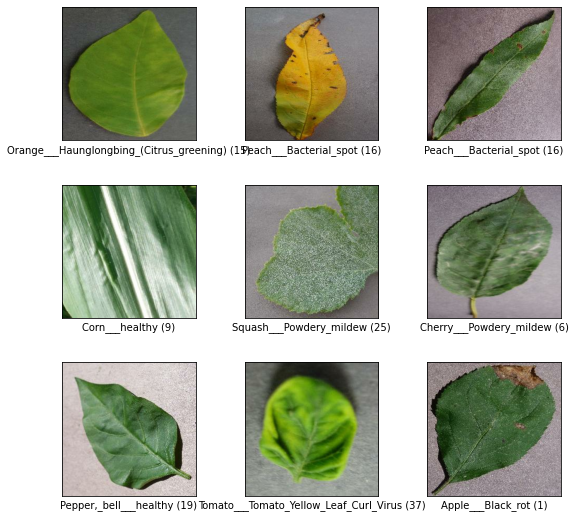

In [55]:
fig = tfds.show_examples(training_set, info)

,image,label
0,,24 (Soybean___healthy)
1,,4 (Blueberry___healthy)
2,,24 (Soybean___healthy)
3,,15 (Orange___Haunglongbing_(Citrus_greening))

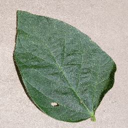
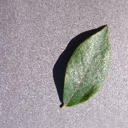
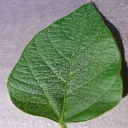
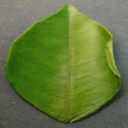

In [56]:
tfds.as_dataframe(training_set.take(4), info)

In [57]:
images, labels = [], []
for img, lbl in training_set.take(4):
 img = tf.squeeze(img)
 images.append(img), labels.append(lbl)

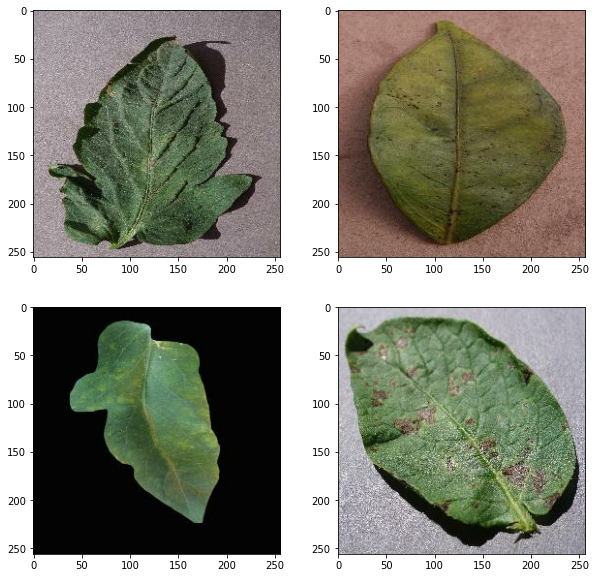

In [58]:
rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
 plt.subplot(rows, cols, i + 1)
 plt.imshow(images[i], cmap='bone')


(0.0, 1.0, 0.0, 1.0)

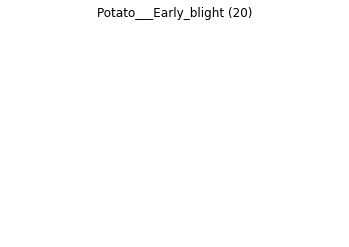

In [59]:
 t = class_labels[labels[i]] + ' (' +\
 str(labels[i].numpy()) + ')'
 plt.title(t)
 plt.axis('off')

In [60]:
features, labels = [], []
for img, lbl in training_set.take(4):
 img = tfds.as_numpy(img)
 lbl = tfds.as_numpy(lbl)
 features.append(img)
 labels.append(lbl)

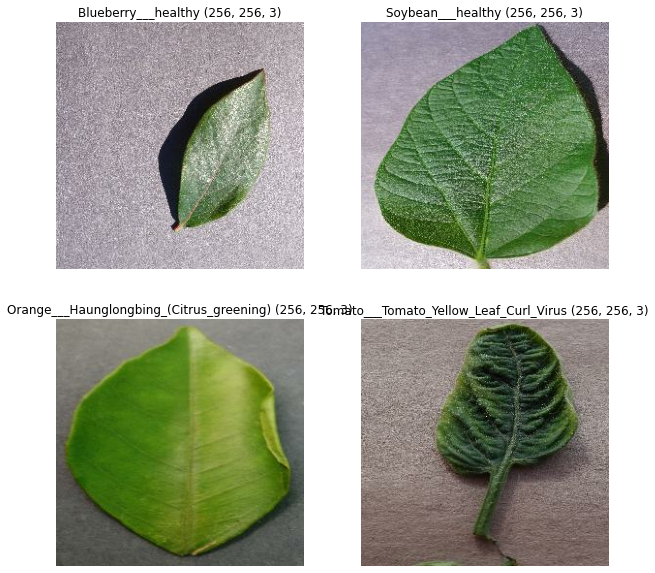

In [61]:
rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
 c = class_labels[labels[i]]
 s = str(features[i].shape)
 title = c + ' ' + s
 plt.subplot(rows, cols, i + 1)
 plt.title(title)
 plt.imshow(features[i], cmap='binary')
 plt.axis('off')

**Reformatar imagens**

In [62]:

def format_image(image, label):
 image = tf.image.resize(image, (150, 150))/255.0
 return image, label

**Construir o pipeline de entrada**

In [63]:
BATCH_SIZE = 200
SHUFFLE_SIZE = 500

In [64]:
train_batches = training_set.shuffle(SHUFFLE_SIZE).\
map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

In [65]:
validation_batches = validation_set.\
map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

In [66]:
test_batches = test_set.\
map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

*Por batching (lote), o tempo de treinamento é reduzido. Ao embaralhar, a precisão geralmente é aumentada.
O armazenamento em cache ajuda a gerenciar melhor a memória e a pré-busca deve reduzir o tempo de treinamento.*
Inspecione os tensores:

In [67]:
train_batches, validation_batches, test_batches

**Visualize e inspecione exemplos de um Lote (Batch)**

In [68]:
for img, lbl in train_batches.take(1):
 print (img.shape)

(200, 150, 150, 3)


Inspecione o primeiro exemplo do lote:

In [69]:
img[0].shape, class_labels[lbl[0].numpy()]

(TensorShape([150, 150, 3]), 'Apple___healthy')

*O exemplo contém uma imagem 150 × 150 × 3 de uma “folha saudável” ou uma “folha não saudável”. Não podemos
saber qual por causa dos efeitos de randomização.*
Extraia quatro exemplos em listas:

In [70]:
images, labels = [], []
for i in range(4):
 tf.squeeze(img[i])
 images.append(img[i]), labels.append(lbl[i])

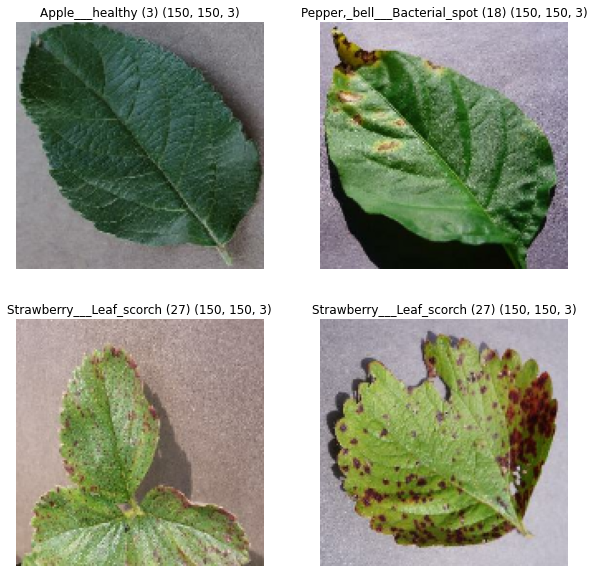

In [71]:
rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
 plt.subplot(rows, cols, i + 1)
 plt.imshow(images[i], cmap='bone')
 t = class_labels[labels[i]] + ' (' +\
 str(labels[i].numpy()) + ') ' +\
 str(images[i].shape)
 plt.title(t)
 plt.axis('off')

**Build the Model**

Get input shape:


In [72]:
for img, lbl in train_batches.take(1):
 in_shape = img.shape[1:]
in_shape

TensorShape([150, 150, 3])

Import libraries:

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten, Dropout

In [74]:
import numpy as np
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

In [75]:
def build_model():
 model = \
 Sequential([
 Conv2D(32, (3, 3), activation = 'relu',
 input_shape=in_shape, strides=1,
 kernel_regularizer='l1_l2'),
 MaxPooling2D(2, 2),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D(2, 2),
 Conv2D(128, (3, 3), activation='relu'),
 MaxPooling2D(2),
 Conv2D(128, (3, 3), activation='relu'),
 MaxPooling2D(2, 2),
 Flatten(),
 Dense(512, activation='relu'),
 Dense(num_classes, activation='sigmoid')])
 return model

In [76]:
plant_village = build_model()

In [77]:
plant_village.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

**Compile and Train the Model**

Compile:

In [78]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(
 from_logits=True)
plant_village.compile(optimizer='adam',
 loss=loss,
 metrics=['accuracy'])

Train:

In [82]:
epochs = 1
history = plant_village.fit(
 train_batches,
 epochs=epochs,
 verbose=1,   
 validation_data=validation_batches)

UnknownError: ignored

In [ ]:
test_batches = test_set.\
map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

In [ ]:
test_batches = test_set.\
map(format_image).batch(BATCH_SIZE).cache().prefetch(1)

The model learns from the training set and validates with the validation set. The
model never touches the test set.

**Evaluate the Model for Generalizability**

Use the evaluate method with the test batch:

In [ ]:
metrics = plant_village.evaluate(test_batches)

The evaluate() method returns the loss and accuracy values. We use test_batches
to evaluate for generalizability because the model has never seen this dataset.
Generalization is a learning model’s ability to adapt properly to new, previously unseen
data, drawn from the same distribution as the one used to create the model.

**Visualize Performance**

In [ ]:
def viz(hd):
 acc = hd['accuracy']
 val_acc = hd['val_accuracy']
 loss = hd['loss']
 val_loss = hd['val_loss']
 plt.figure(figsize=(8, 8))
 plt.subplot(1, 2, 1)
 plt.plot(acc, label='Training Accuracy')
 plt.plot(val_acc, label='Validation Accuracy')
 plt.legend(loc='lower right')
 plt.title('Training and Validation Accuracy')
  plt.subplot(1, 2, 2)
 plt.plot(loss, label='Training Loss')
 plt.plot(val_loss, label='Validation Loss')
 plt.legend(loc='upper right')
 plt.title('Training and Validation Loss')
 plt.show()

Invoke the function:

In [ ]:
viz(history.history)

In [ ]:
# Build your input pipeline
#ds = ds.shuffle(1000).batch(128).prefetch(10).take(5)
#ds = ds.shuffle(1000).batch(128).take(5)
#for features in ds.take(1):
 # image, label = features[0], features[1]
 # print(type(image))
#  print(type(label))



In [ ]:
#input_shape = (32,32, 3)
#num_classes = 10
#batch_size = 32
#epochs = 10

In [ ]:
#l = tf.keras.layers

In [ ]:
#model = tf.keras.Sequential([
#    l.Conv2D(
#       32, 5, padding='same', activation='relu', input_shape=input_shape),
 #   l.MaxPooling2D((2, 2), (2, 2), padding='same'),
  #  l.BatchNormalization(),
 #   l.Conv2D(64, 5, padding='same', activation='relu'),
 #   l.MaxPooling2D((2, 2), (2, 2), padding='same'),
 #   l.Flatten(),
#    l.Dense(1024, activation='relu'),
##    l.Dropout(0.4),
#    l.Dense(num_classes, activation='softmax')
#])

In [ ]:
#model.summary()

#callbacks = [tf.keras.callbacks.TensorBoard(log_dir=logdir, profile_batch=0)]
#

In [ ]:
#model.compile(
 #   loss=tf.keras.losses.categorical_crossentropy,
##    optimizer='adam',
#    metrics=['accuracy'])

In [ ]:
#model.fit(ds)
          
        



In [ ]:
#ds = ds.take(1)

In [ ]:
#for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  #print(list(example.keys()))
  #image = example["image"]
  #label = example["label"]
  #print(image.shape, label)
  #print(example.index)
  #print(len(example))

  #image = example[0]
 ## label = example[1]

#  print(image.shape, label)
#print(type(image))
#  print(type(label))
##  image = image/255
#print(image.shape)
#  print(label.shape)
  #assert image.shape == (28, 28, 1)

In [ ]:
#def normalize_img(image, label):
 # return tf.cast(image, tf.float32) / 255., label

**Construindo o Modelo**

In [ ]:

#def resize_with_crop(image, label):
#    i = image
#    i = tf.cast(i, tf.float32)
#    i = tf.image.resize_with_crop_or_pad(i, 224, 224)
#    i = tf.keras.applications.mobilenet_v2.preprocess_input(i)
#    return (i, label)

# Preprocess the images
#ds = ds.map(resize_with_crop)

In [ ]:

#def resize_with_crop(image, label):
 #   i = image
 #   i = tf.cast(i, tf.float32)
 #   i = tf.image.resize_with_crop_or_pad(i, 224, 224)
 #   i = tf.keras.applications.mobilenet_v2.preprocess_input(i)
 #   return (i, label)

# Preprocess the images
#ds = ds.map(resize_with_crop)

In [ ]:
#for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  #print(list(example.keys()))
  #image = example["image"]
  #label = example["label"]
  #print(image.shape, label)
  #print(example.index)
  #print(len(example))

  #image = example[0]
  #label = example[1]

 # print(image.shape, label)
  #print(type(image))
 # print(type(label))
 # image = image/255
 # print(image.shape)
 # print(label.shape)
  #assert image.shape == (28, 28, 1)

In [ ]:
#info

In [ ]:
#ds = ds.batch(2).prefetch(1)

In [ ]:
#builder = tfds.builder('plant_village')
#info = builder.info

**Treinando o Modelo**

In [ ]:
#print(info)

In [ ]:
#info.features

In [ ]:
#print(info.features["label"].num_classes)
#print(info.features["label"].names)
#print(info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')


In [ ]:
#print(info.features.shape)
#print(info.features.dtype)
#print(info.features['image'].shape)
#print(info.features['image'].dtype)

In [ ]:
#print(info.splits)

In [ ]:
#print(list(info.splits.keys()))

In [ ]:
#print(info.splits['train'].num_examples)
#print(info.splits['train'].filenames)
#print(info.splits['train'].num_shards)



# Também funciona com a API subsplit:

#print(info.splits['train[15%:75%]'].num_examples)
#print(info.splits['train[15%:75%]'].file_instructions)

In [ ]:
#assert isinstance(ds, tf.data.Dataset)
#print(ds)

In [ ]:
#import time

In [ ]:
#def benchmark(dataset, num_epochs=2):
 #   start_time = time.perf_counter()
 #   for epoch_num in range(num_epochs):
 #       for sample in dataset:
            # Performing a training step
 #           time.sleep(0.01)
  #  print("Execution time:", time.perf_counter() - start_time)

In [ ]:
#benchmark(ds)

In [ ]:
#for image, label in ds:  # example is (image, label)
  print(image.shape, label)

# **RESHAPE**

In [ ]:
#ds = ds.take(1)

#for image, label in tfds.as_numpy(ds):
  #print(type(image), type(label), label)

In [ ]:
#print(type(image), image.shape)

In [ ]:
#import pandas as pd

In [ ]:
#ds = tfds.load("plant_village")


In [ ]:
#ds

In [ ]:
# Build your input pipeline
#dataset = dataset.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
#for features in dataset.take(1):
#  image, label = features["image"], features["label"]
 # print(type(image))
#b  print(type(label))

In [ ]:
#villa = tfds.image.PlantVillage

In [ ]:
#assert tfds.image.PlantVillage.info.features['image']

In [ ]:
#print(info.splits["train"].num_examples)

In [ ]:
#(training_images, training_labels) = tfds.as_numpy(tfds.load('plant_village', split = ['train'], batch_size=-1, as_supervised=True)) 
 
